In [1]:
import statsmodels.api as sm

In [11]:
import pandas as pd
import numpy as np

In [12]:
import matplotlib.pyplot as plt

## 1. Outliers

### Import cars data to pandas dataframe

In [13]:
cars= pd.read_csv('accord_sedan.csv')

In [51]:
print(cars.head())

   price  mileage  year trim engine transmission  isOutlierPrice  \
0  14995    67697  2006   ex  4 Cyl       Manual               0   
1  11988    73738  2006   ex  4 Cyl       Manual               0   
2  11999    80313  2006   lx  4 Cyl    Automatic               0   
3  12995    86096  2006   lx  4 Cyl    Automatic               0   
4  11333    79607  2006   lx  4 Cyl    Automatic               0   

   isOutlierMileage  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  


## Distribution Graphs

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff6bb822130>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff6bb8227f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff6bb80dd90>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff6bb822eb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff6bb82f250>],
 'means': []}

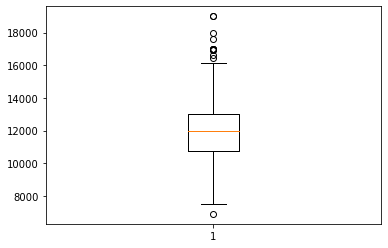

In [9]:
plt.boxplot(cars['price'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff6b90ba310>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff6bb76cbe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff6a80f9cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff6bb76c5e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff6bb75d430>],
 'means': []}

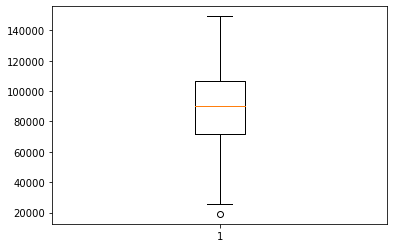

In [14]:
axes=plt.axes()
plt.boxplot(cars['mileage'])

## Joint Distribution

Text(0, 0.5, 'Mileage')

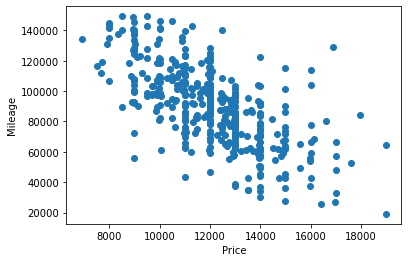

In [13]:
axes= plt.axes()
plt.scatter(cars.price, cars.mileage)
axes.set_xlabel('Price')
axes.set_ylabel('Mileage')

In [15]:
print(cars.describe())

              price        mileage    year
count    417.000000     417.000000   417.0
mean   12084.242206   89725.779376  2006.0
std     2061.430034   25957.872271     0.0
min     6900.000000   19160.000000  2006.0
25%    10779.000000   71844.000000  2006.0
50%    11995.000000   89900.000000  2006.0
75%    13000.000000  106705.000000  2006.0
max    18995.000000  149269.000000  2006.0


In [31]:
cars['isOutlierPrice'] = cars['price'].apply(lambda x: 1 if x >((cars['price'].std())*2)+(cars['price'].mean())else 0)

In [34]:
cars['isOutlierMileage'] = cars['mileage'].apply(lambda x: 1 if x >((cars['mileage'].std())*2)+(cars['mileage'].mean())else 0)

Text(0.5, 1.0, 'Price')

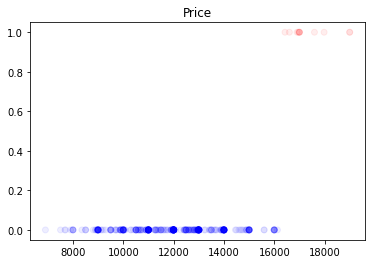

In [53]:
colourPalette = {True: '#ff000011', False: '#0000ff11'}
colours = cars['isOutlierPrice'].map(colourPalette)

ax= plt.axes()
ax.scatter(cars['price'], cars['isOutlierPrice'], c=colours)
ax.set_title('Price')

Text(0.5, 1.0, 'Mileage')

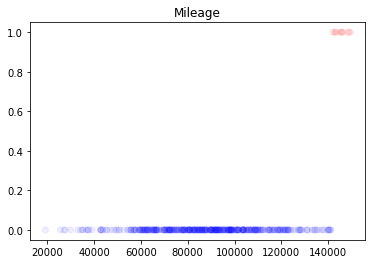

In [52]:
colours1 = cars['isOutlierMileage'].map(colourPalette)
ax= plt.axes()
ax.scatter(cars['mileage'], cars['isOutlierMileage'], c=colours1)
ax.set_title('Mileage')

## 2. Q-Q Plots

In [54]:
import statsmodels.api as sm
Who_data = pd.read_csv('TB_burden_countries_2014-09-29.csv')

In [55]:
print(Who_data.describe())

       iso_numeric         year     e_pop_num  e_prev_100k  e_prev_100k_lo  \
count  4903.000000  4903.000000  4.903000e+03  4892.000000     4892.000000   
mean    433.487457  2001.042219  2.899179e+07   207.694422       93.683299   
std     255.202944     6.643548  1.177827e+08   269.720954      138.015090   
min       4.000000  1990.000000  1.129000e+03     0.260000        0.080000   
25%     212.000000  1995.000000  5.508830e+05    25.000000       10.000000   
50%     430.000000  2001.000000  5.140332e+06    93.000000       37.000000   
75%     646.000000  2007.000000  1.732282e+07   306.000000      129.250000   
max     894.000000  2012.000000  1.377065e+09  1860.000000     1316.000000   

       e_prev_100k_hi    e_prev_num  e_prev_num_lo  e_prev_num_hi  \
count     4892.000000  4.892000e+03   4.892000e+03   4.892000e+03   
mean       378.137001  6.914368e+04   4.366106e+04   1.064607e+05   
std        501.059424  3.304527e+05   2.729764e+05   4.152786e+05   
min          0.540000

In [57]:
Who_data = Who_data.fillna(Who_data.mean())

Who_data_n=Who_data.select_dtypes(include='number')


Who_data_n_RangeNormalised=(Who_data_n-Who_data_n.min())/(Who_data_n.max()-Who_data_n.min())
print(Who_data_n_RangeNormalised.describe())



       iso_numeric         year    e_pop_num  e_prev_100k  e_prev_100k_lo  \
count  4903.000000  4903.000000  4903.000000  4903.000000     4903.000000   
mean      0.482570     0.501919     0.021053     0.111539        0.071131   
std       0.286745     0.301979     0.085532     0.144869        0.104763   
min       0.000000     0.000000     0.000000     0.000000        0.000000   
25%       0.233708     0.227273     0.000399     0.013303        0.007538   
50%       0.478652     0.500000     0.003732     0.049867        0.028056   
75%       0.721348     0.772727     0.012579     0.164130        0.097969   
max       1.000000     1.000000     1.000000     1.000000        1.000000   

       e_prev_100k_hi   e_prev_num  e_prev_num_lo  e_prev_num_hi  \
count     4903.000000  4903.000000    4903.000000    4903.000000   
mean         0.105934     0.015031       0.010915       0.020473   
std          0.140413     0.071757       0.068167       0.079772   
min          0.000000     0.000000

In [58]:
mu = 0
sigma = 0.1
normal_sample = np.random.normal(mu, sigma, 4903)

(array([598., 437., 552., 391., 575., 520., 494., 491., 508., 337.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

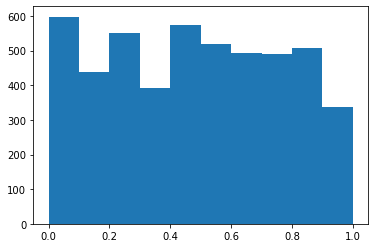

In [59]:
plt.hist(Who_data_n_RangeNormalised['iso_numeric'])